# Results for DLSCORE

#### This section contains the graphs, variables, and methodology followed in order to obtain the results publised in "DLSCORE: A Deep Learning Model for Predicting Protein-Ligand Binding Affinities" by Hassan, Castaneda-Mogollon, et. al.


## Importing modules

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from numpy import linspace
from scipy.stats import gaussian_kde
from metk_dir.modelevaltoolkit import metk
from metk_dir.modelevaltoolkit import metk_report
from metk_dir.modelevaltoolkit import metk_plots
from metk_dir.modelevaltoolkit import metk_util
import sys
import os
from IPython.utils import io

## Assigning variables

#### Here, we give x_15 and x_100 the number of desired networks (15 and 100), while the y_values represent different statistical values, such as Pearson, Spearman, and Kendall correlation coefficients (R2), RMSE, MAE (kcal/mol) given the results from the test set.

In [2]:
x_15 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
x_100 = [1,5,10,20,30,50,75,100]
y_pearson_15 = [0.75,0.79,0.80,0.80,0.80,0.81,0.81,0.81,0.81,0.82,0.81,0.82,0.82,0.82,0.82]
y_spearman_15= [0.86,0.86,0.89,0.89,0.89,0.89,0.89,0.90,0.89,0.89,0.89,0.90,0.90,0.90,0.90]
y_kendall_15 = [0.69,0.72,0.72,0.73,0.73,0.74,0.74,0.74,0.74,0.73,0.74,0.74,0.74,0.74,0.74]
y_rmse_15 =[1.29,1.23,1.18,1.16,1.17,1.16,1.16,1.14,1.15,1.15,1.17,1.17,1.18,1.18,1.19]
y_mae_15 = [0.99,0.94,0.89,0.86,0.87,0.86,0.86,0.84,0.86,0.86,0.89,0.89,0.90,0.90,0.91]
y_pearson_100 = [0.75,0.80,0.82,0.81,0.82,0.82,0.81,0.81]
y_spearman_100= [0.86,0.86,0.90,0.90,0.90,0.90,0.90,0.89]
y_kendall_100 = [0.69,0.73,0.74,0.74,0.74,0.74,0.74,0.73]
y_rmse_100 =[1.29,1.17,1.15,1.29,1.26,1.47,1.69,2.03]
y_mae_100 = [0.99,0.87,0.86,1.02,0.98,1.20,1.38,1.69]


## Creating methods to display the values given different set of networks

### Plot 1: Statistical values and plot given 100 networks 

In [3]:
def first_plot():
    fig = plt.figure(figsize=(8,6))
    pp = PdfPages('100_networks_graph.pdf')
    ax = fig.add_subplot(111)
    plt.subplot(211)

    #rmse_plot = plt.plot(x_15,y_rmse_15,'bo-',label='RMSE')
    #mae_plot = plt.plot(x_15,y_mae_15,'go-',label='MAE')
    plt.plot(x_100,y_spearman_100,'go-',label='Spearman')
    plt.plot(x_100,y_pearson_100,'bo-',label='Pearson')
    plt.plot(x_100,y_kendall_100,'ro-',label='Kendall')
    plt.ylabel("Correlation coefficient R2")
    plt.ylim(0.65,0.93)
    plt.grid(False)
    plt.legend(prop={'size': 7},loc='lower center', bbox_to_anchor=(0.5, 0),fancybox=True, ncol=3)
    plt.subplot(212)


    rmse2_plot = plt.plot(x_100,y_rmse_100,'bo-',label='RMSE')
    mae2_plot = plt.plot(x_100,y_mae_100,'go-',label='MAE')
    plt.grid(False)
    plt.ylim(0.5,2.1)
    ax.set_xlabel('common xlabel')
    plt.ylabel("Error metrics (kcal/mol)")
    fig.text(0.5, 0.04, 'Number of networks', ha='center')
    plt.legend(prop={'size': 7},loc='lower center', bbox_to_anchor=(0.5, 0),fancybox=True, ncol=3)
    plt.savefig('/Users/Danniel/Desktop/100_networks.pdf', format='pdf')
    plt.show()

### Plot 2: Statistical values and plot given 15 networks

In [4]:
def second_plot():
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    plt.subplot(211)
    plt.plot(x_15, y_spearman_15, 'go-', label='Spearman')
    plt.plot(x_15, y_pearson_15, 'bo-', label='Pearson')
    plt.plot(x_15, y_kendall_15, 'ro-', label='Kendall')
    plt.ylabel("Correlation coefficient R2")
    plt.ylim(0.65,0.93)
    plt.grid(False)
    plt.legend(prop={'size': 7},loc='lower center', bbox_to_anchor=(0.5, 0),fancybox=True, ncol=3)

    plt.subplot(212)

    rmse2_plot = plt.plot(x_15, y_rmse_15, 'bo-', label='RMSE')
    mae2_plot = plt.plot(x_15, y_mae_15, 'go-', label='MAE')
    plt.grid(False)
    plt.ylim(0.5, 2.1)
    plt.legend(loc='lower center', prop={'size': 7}, bbox_to_anchor=(0.5, 0),fancybox=True, ncol=3)
    plt.grid(False)
    ax.set_xlabel('common xlabel')
    plt.ylabel("Error metrics (kcal/mol)")
    fig.text(0.5, 0.04, 'Number of networks', ha='center')
    plt.savefig('/Users/Danniel/Desktop/15_networks.pdf', format='pdf')
    plt.show()

In [11]:
def walter_metrics_nn(path):
    os.chdir(path)
    metk.calling('nn_refined_walters.csv','out_general_nnscore','uM')

In [12]:
def walter_metrics_vina(path):
    metk.calling('vina_refined_walters.csv','out_general_vina','uM')
    

In [13]:
def walter_metrics_dlscore(path):
    metk.calling('dlscore_refined_walters.csv','out_general_dlscore','uM')

### Statistical values for 100 networks:

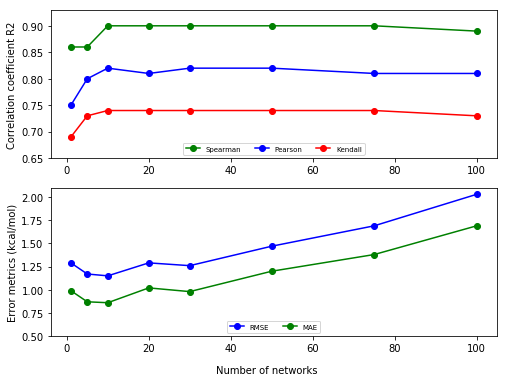

In [14]:
first_plot()

### Statistical values for 15 networks:

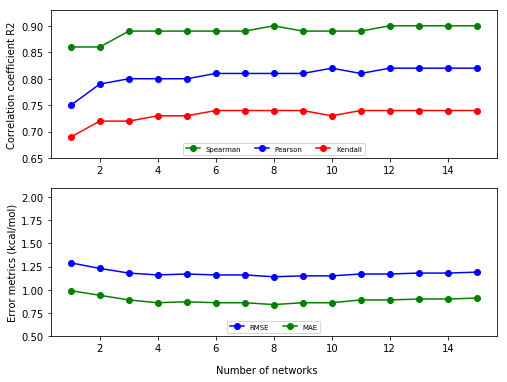

In [15]:
second_plot()

### Metrics for NNScore 2.0:

N = 300
RMSE = 2.78 kcal/mol
MAE  = 2.03 kcal/mol
Max possible correlation = 0.98
Pearson R^2 = 0.21  95%CI = 0.14 0.28
Spearman rho = 0.47
Kendall tau = 0.33
Report written to out_general_nnscore.txt
Plots written to out_general_nnscore.pdf


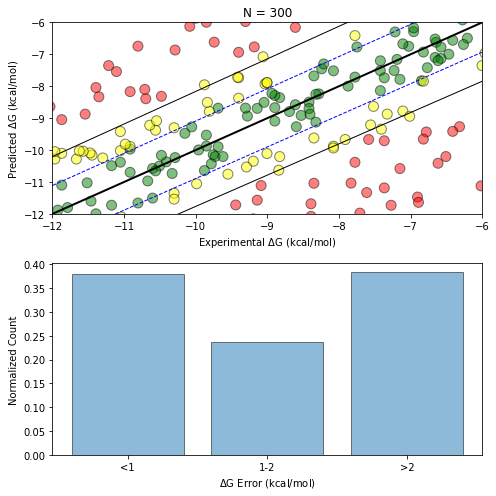

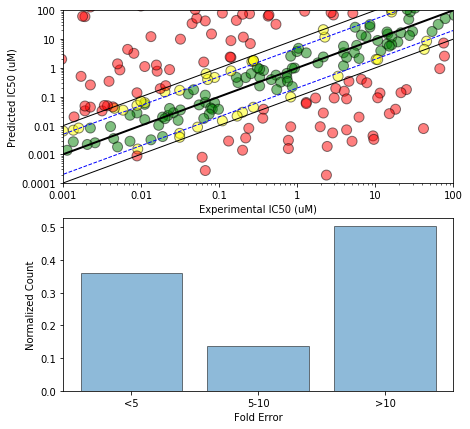

In [16]:
walter_metrics_nn('/Users/Danniel/Desktop')

### Metrics for Autodock Vina:

N = 300
RMSE = 3.17 kcal/mol
MAE  = 2.50 kcal/mol
Max possible correlation = 0.98
Pearson R^2 = 0.15  95%CI = 0.09 0.22
Spearman rho = 0.39
Kendall tau = 0.27
Report written to out_general_vina.txt
Plots written to out_general_vina.pdf


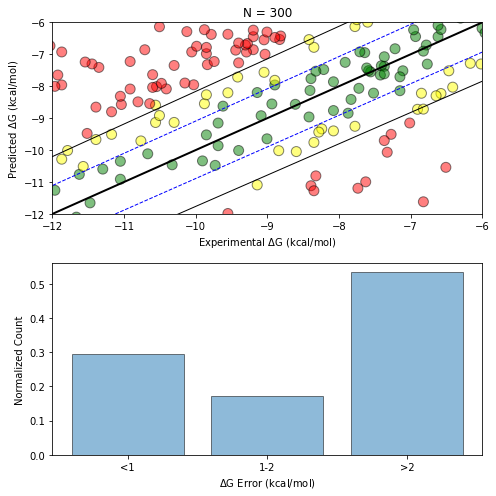

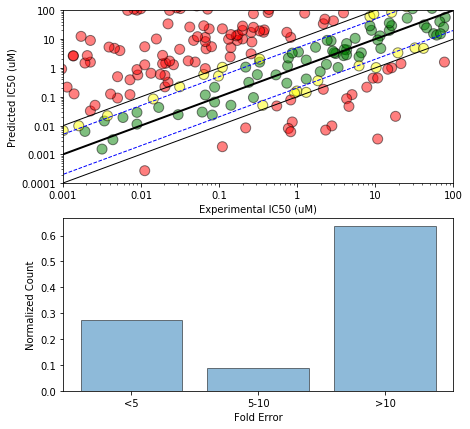

In [17]:
walter_metrics_vina('/Users/Danniel/Desktop')

### Metrics for DLSCORE:

N = 300
RMSE = 1.15 kcal/mol
MAE  = 0.86 kcal/mol
Max possible correlation = 0.98
Pearson R^2 = 0.82  95%CI = 0.78 0.84
Spearman rho = 0.90
Kendall tau = 0.74
Report written to out_general_dlscore.txt
Plots written to out_general_dlscore.pdf


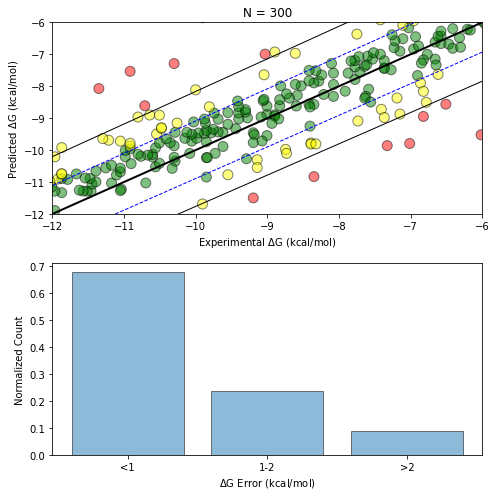

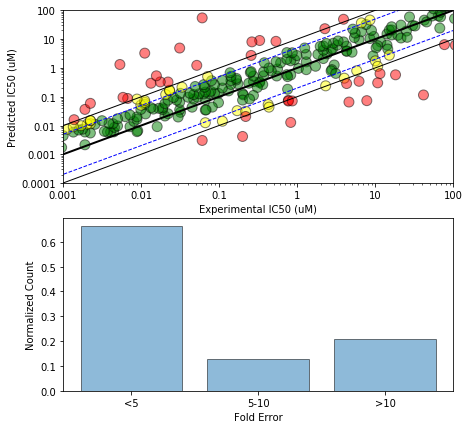

In [18]:
walter_metrics_dlscore('/Users/Danniel/Desktop')